Universidad Iberoamericana

18/11/2022

Dr. Lázaro Bustio Martínez

Ciencia de Datos

Samuel Eduardo Toledo Izquierdo

223913-A

Turistas Futuristas en México

In [ ]:
#Instalando librerías a utilizar
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importando las librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io as io
import random 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import scipy.cluster.hierarchy as sch
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
#Cargar los archivos
from google.colab import files
uploaded = files.upload()

Saving Gasto total de visitantes internacionales que ingresan al país por objetivo de viaje, según categoría de visitante y medio de transporte - Hoja 2.csv to Gasto total de visitantes internacionales que ingresan al país por objetivo de viaje, según categoría de visitante y medio de transporte - Hoja 2.csv


In [ ]:
#Lectura del archivo
gastos = pd.read_csv(io.BytesIO(uploaded['Gasto total de visitantes internacionales que ingresan al país por objetivo de viaje, según categoría de visitante y medio de transporte - Hoja 2.csv']), sep = ',')
# Forma de los datos
print('Base shape: ', gastos.shape)

Base shape:  (144, 12)


In [ ]:
gastos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      144 non-null    int64  
 1   Mes                      144 non-null    object 
 2   Tipo                     144 non-null    object 
 3   Método de Transporte     144 non-null    object 
 4   Placer                   144 non-null    int64  
 5   Trabajo o Negocios       144 non-null    int64  
 6   Estudio                  48 non-null     float64
 7   En tránsito              48 non-null     float64
 8   Visita familia o amigos  144 non-null    int64  
 9   Atención Médica          96 non-null     float64
 10  Compras                  96 non-null     float64
 11  Otros                    144 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 13.6+ KB


In [ ]:
#tipo de datos
gastos.dtypes

Año                          int64
Mes                         object
Tipo                        object
Método de Transporte        object
Placer                       int64
Trabajo o Negocios           int64
Estudio                    float64
En tránsito                float64
Visita familia o amigos      int64
Atención Médica            float64
Compras                    float64
Otros                        int64
dtype: object

In [ ]:
gastos.describe()

,Año,Placer,Trabajo o Negocios,Estudio,En tránsito,Visita familia o amigos,Atención Médica,Compras,Otros
count,144.000000,1.440000e+02,1.440000e+02,4.800000e+01,4.800000e+01,1.440000e+02,9.600000e+01,9.600000e+01,1.440000e+02
mean,2019.083333,2.014745e+08,1.617128e+07,4.987733e+06,5.542799e+06,5.536750e+07,8.677539e+06,7.504066e+06,3.405423e+06
std,0.704630,4.577672e+08,3.636917e+07,9.062613e+06,4.926614e+06,5.958352e+07,1.032528e+07,9.600742e+06,6.168618e+06
min,2018.000000,3.062020e+05,0.000000e+00,0.000000e+00,2.252670e+05,2.541361e+06,1.156800e+05,3.225200e+04,8.940000e+02
25%,2019.000000,3.193808e+06,3.241325e+05,1.216150e+04,1.015400e+06,1.105016e+07,1.735214e+06,4.543085e+05,4.522400e+05
50%,2019.000000,1.404077e+07,1.285860e+06,1.659850e+05,2.505755e+06,3.573923e+07,4.094472e+06,2.616347e+06,1.943850e+06
75%,2020.000000,2.762251e+07,3.920033e+06,7.771081e+06,1.082558e+07,7.100579e+07,1.094796e+07,9.138612e+06,5.040644e+06
max,2020.000000,1.814165e+09,1.567465e+08,5.346828e+07,1.479708e+07,2.547194e+08,3.502890e+07,3.377083e+07,6.326053e+07


In [ ]:
gastos

,Año,Mes,Tipo,Método de Transporte,Placer,Trabajo o Negocios,Estudio,En tránsito,Visita familia o amigos,Atención Médica,Compras,Otros
0,2018,Agosto,Turistas de internación,Vía aérea,1061709488,59643083,11441188.0,2787829.0,213527626,NaN,NaN,9641692
1,2018,Agosto,Turistas de internación,Vía terrestre,37061291,2852472,0.0,9810388.0,53311835,NaN,NaN,2650108
2,2018,Agosto,Turistas fronterizos,Peatones,2452448,765563,NaN,NaN,8641804,295527.0,55449.0,129188
3,2018,Agosto,Turistas fronterizos,En automóviles,22349789,1869397,NaN,NaN,58978297,2892504.0,2380586.0,921678
4,2018,Agosto,Excursionistas fronterizos,Peatones,3065307,367775,NaN,NaN,3792649,4531877.0,5359163.0,2232422
...,...,...,...,...,...,...,...,...,...,...,...,...
139,2020,Diciembre,Turistas de internación,Vía terrestre,21001534,2824214,37203.0,8413996.0,84091168,NaN,NaN,6589949
140,2020,Diciembre,Turistas fronterizos,Peatones,306202,13648,NaN,NaN,8165619,115680.0,32252.0,8690
141,2020,Diciembre,Turistas fronterizos,En automóviles,6412694,519341,NaN,NaN,49271001,2779760.0,580598.0,483832
142,2020,Diciembre,Excursionistas fronterizos,Peatones,802105,151450,NaN,NaN,2667701,3536189.0,3219293.0,229376


In [ ]:
gastos.head()

,Año,Mes,Tipo,Método de Transporte,Placer,Trabajo o Negocios,Estudio,En tránsito,Visita familia o amigos,Atención Médica,Compras,Otros
0,2018,Agosto,Turistas de internación,Vía aérea,1061709488,59643083,11441188.0,2787829.0,213527626,NaN,NaN,9641692
1,2018,Agosto,Turistas de internación,Vía terrestre,37061291,2852472,0.0,9810388.0,53311835,NaN,NaN,2650108
2,2018,Agosto,Turistas fronterizos,Peatones,2452448,765563,NaN,NaN,8641804,295527.0,55449.0,129188
3,2018,Agosto,Turistas fronterizos,En automóviles,22349789,1869397,NaN,NaN,58978297,2892504.0,2380586.0,921678
4,2018,Agosto,Excursionistas fronterizos,Peatones,3065307,367775,NaN,NaN,3792649,4531877.0,5359163.0,2232422


In [ ]:
gastos.tail()

,Año,Mes,Tipo,Método de Transporte,Placer,Trabajo o Negocios,Estudio,En tránsito,Visita familia o amigos,Atención Médica,Compras,Otros
139,2020,Diciembre,Turistas de internación,Vía terrestre,21001534,2824214,37203.0,8413996.0,84091168,NaN,NaN,6589949
140,2020,Diciembre,Turistas fronterizos,Peatones,306202,13648,NaN,NaN,8165619,115680.0,32252.0,8690
141,2020,Diciembre,Turistas fronterizos,En automóviles,6412694,519341,NaN,NaN,49271001,2779760.0,580598.0,483832
142,2020,Diciembre,Excursionistas fronterizos,Peatones,802105,151450,NaN,NaN,2667701,3536189.0,3219293.0,229376
143,2020,Diciembre,Excursionistas fronterizos,En automóviles,4296078,1514705,NaN,NaN,16296764,19936039.0,10796184.0,4308617


In [ ]:
#Realizar un análisis a los nombres de las columnas en búsqueda de errores
cols_names = gastos.columns
for col_name in cols_names:
  print(col_name + "\n")

Año

Mes

Tipo

Método de Transporte

Placer

Trabajo o Negocios

Estudio

En tránsito

Visita familia o amigos

Atención Médica

Compras

Otros



In [ ]:
# determinando los valores faltantes en los datos
na=pd.DataFrame(gastos.isna().sum())
na

,0
Año,0
Mes,0
Tipo,0
Método de Transporte,0
Placer,0
Trabajo o Negocios,0
Estudio,96
En tránsito,96
Visita familia o amigos,0
Atención Médica,48


In [ ]:
#Mostrar el porcentaje de los datos faltantes 
for column in gastos.columns:
    percentage = gastos[column].isnull().mean()
    print(f"{column}: {round(percentage*100, 2)}%")

Año: 0.0%
Mes: 0.0%
Tipo: 0.0%
Método de Transporte: 0.0%
Placer: 0.0%
Trabajo o Negocios: 0.0%
Estudio: 66.67%
En tránsito: 66.67%
Visita familia o amigos: 0.0%
Atención Médica: 33.33%
Compras: 33.33%
Otros: 0.0%


In [ ]:
#Mejor visualización
gastos.isnull().sum().sort_values(ascending=False)

Estudio                    96
En tránsito                96
Atención Médica            48
Compras                    48
Año                         0
Mes                         0
Tipo                        0
Método de Transporte        0
Placer                      0
Trabajo o Negocios          0
Visita familia o amigos     0
Otros                       0
dtype: int64

In [ ]:
gastos.shape

(144, 12)

In [ ]:
#Sustituir los valores por la media
#La media reemplaza los datos numéricos

mean = (gastos["Estudio"].mean())
gastos["Estudio"].fillna(mean, inplace=True)

mean = (gastos["En tránsito"].mean())
gastos["En tránsito"].fillna(mean, inplace=True)

mean = (gastos["Atención Médica"].mean())
gastos["Atención Médica"].fillna(mean, inplace=True)

mean = (gastos["Compras"].mean())
gastos["Compras"].fillna(mean, inplace=True)

In [ ]:
gastos['Estudio'].convert_dtypes()
pd.to_numeric(gastos['Estudio'], errors='coerce')
gastos['Estudio'] = pd.to_numeric(gastos['Estudio'], errors='coerce').convert_dtypes()

gastos['En tránsito'].convert_dtypes()
pd.to_numeric(gastos['En tránsito'], errors='coerce')
gastos['En tránsito'] = pd.to_numeric(gastos['En tránsito'], errors='coerce').convert_dtypes()

gastos['Atención Médica'].convert_dtypes()
pd.to_numeric(gastos['Atención Médica'], errors='coerce')
gastos['Atención Médica'] = pd.to_numeric(gastos['Atención Médica'], errors='coerce').convert_dtypes()

gastos['Compras'].convert_dtypes()
pd.to_numeric(gastos['Compras'], errors='coerce')
gastos['Compras'] = pd.to_numeric(gastos['Compras'], errors='coerce').convert_dtypes()

#gastos['Estudio'] = pd.to_numeric(gastos['Estudio'])
#gastos['En tránsito'] = pd.to_numeric(gastos['En tránsito'])
#gastos['Atención Médica'] = pd.to_numeric(gastos['Atención Médica'])
#gastos['Compras'] = pd.to_numeric(gastos['Compras'])
#gastos['Estudio'] = pd.to_numeric(gastos['Estudio'], errors='coerce').convert_dtypes()
#gastos['En tránsito'] = pd.to_numeric(gastos['En tránsito'], errors='coerce').convert_dtypes()
#gastos['Atención Médica'] = pd.to_numeric(gastos['Atención Médica'], errors='coerce').convert_dtypes()
#gastos['Compras'] = pd.to_numeric(gastos['Compras'], errors='coerce').convert_dtypes()

In [ ]:
gastos

,Año,Mes,Tipo,Método de Transporte,Placer,Trabajo o Negocios,Estudio,En tránsito,Visita familia o amigos,Atención Médica,Compras,Otros
0,2018,Agosto,Turistas de internación,Vía aérea,1061709488,59643083,11441188.0,2787829.0,213527626,8677538.90625,7504066.322917,9641692
1,2018,Agosto,Turistas de internación,Vía terrestre,37061291,2852472,0.0,9810388.0,53311835,8677538.90625,7504066.322917,2650108
2,2018,Agosto,Turistas fronterizos,Peatones,2452448,765563,4987733.416667,5542798.604167,8641804,295527.0,55449.0,129188
3,2018,Agosto,Turistas fronterizos,En automóviles,22349789,1869397,4987733.416667,5542798.604167,58978297,2892504.0,2380586.0,921678
4,2018,Agosto,Excursionistas fronterizos,Peatones,3065307,367775,4987733.416667,5542798.604167,3792649,4531877.0,5359163.0,2232422
...,...,...,...,...,...,...,...,...,...,...,...,...
139,2020,Diciembre,Turistas de internación,Vía terrestre,21001534,2824214,37203.0,8413996.0,84091168,8677538.90625,7504066.322917,6589949
140,2020,Diciembre,Turistas fronterizos,Peatones,306202,13648,4987733.416667,5542798.604167,8165619,115680.0,32252.0,8690
141,2020,Diciembre,Turistas fronterizos,En automóviles,6412694,519341,4987733.416667,5542798.604167,49271001,2779760.0,580598.0,483832
142,2020,Diciembre,Excursionistas fronterizos,Peatones,802105,151450,4987733.416667,5542798.604167,2667701,3536189.0,3219293.0,229376


In [ ]:
gastos.head()

,Año,Mes,Tipo,Método de Transporte,Placer,Trabajo o Negocios,Estudio,En tránsito,Visita familia o amigos,Atención Médica,Compras,Otros
0,2018,Agosto,Turistas de internación,Vía aérea,1061709488,59643083,11441188.0,2787829.0,213527626,8677538.90625,7504066.322917,9641692
1,2018,Agosto,Turistas de internación,Vía terrestre,37061291,2852472,0.0,9810388.0,53311835,8677538.90625,7504066.322917,2650108
2,2018,Agosto,Turistas fronterizos,Peatones,2452448,765563,4987733.416667,5542798.604167,8641804,295527.0,55449.0,129188
3,2018,Agosto,Turistas fronterizos,En automóviles,22349789,1869397,4987733.416667,5542798.604167,58978297,2892504.0,2380586.0,921678
4,2018,Agosto,Excursionistas fronterizos,Peatones,3065307,367775,4987733.416667,5542798.604167,3792649,4531877.0,5359163.0,2232422


In [ ]:
gastos.tail()

,Año,Mes,Tipo,Método de Transporte,Placer,Trabajo o Negocios,Estudio,En tránsito,Visita familia o amigos,Atención Médica,Compras,Otros
139,2020,Diciembre,Turistas de internación,Vía terrestre,21001534,2824214,37203.0,8413996.0,84091168,8677538.90625,7504066.322917,6589949
140,2020,Diciembre,Turistas fronterizos,Peatones,306202,13648,4987733.416667,5542798.604167,8165619,115680.0,32252.0,8690
141,2020,Diciembre,Turistas fronterizos,En automóviles,6412694,519341,4987733.416667,5542798.604167,49271001,2779760.0,580598.0,483832
142,2020,Diciembre,Excursionistas fronterizos,Peatones,802105,151450,4987733.416667,5542798.604167,2667701,3536189.0,3219293.0,229376
143,2020,Diciembre,Excursionistas fronterizos,En automóviles,4296078,1514705,4987733.416667,5542798.604167,16296764,19936039.0,10796184.0,4308617


In [ ]:
#Mejor visualización
gastos.isnull().sum().sort_values(ascending=False)

Año                        0
Mes                        0
Tipo                       0
Método de Transporte       0
Placer                     0
Trabajo o Negocios         0
Estudio                    0
En tránsito                0
Visita familia o amigos    0
Atención Médica            0
Compras                    0
Otros                      0
dtype: int64

Análisis Exploratorio de Datos

In [ ]:
val = gastos.drop(["Mes", "Tipo", "Método de Transporte"], axis=1).groupby("Año").sum()
val.reset_index(inplace=True)
val

,Año,Placer,Trabajo o Negocios,Estudio,En tránsito,Visita familia o amigos,Atención Médica,Compras,Otros
0,2018,5777552343,625754261,200986322.333333,160243016.083333,1670120561,237818394.0625,245770640.229167,180079871
1,2019,16861868641,1361174470,355773649.0,415485732.0,4322543443,648560172.75,581199637.75,199803076
2,2020,6372912783,341734908,161473640.666667,222434250.916667,1980256170,363187035.6875,253615272.520833,110498003


In [ ]:
#num = val.transpose()
#num

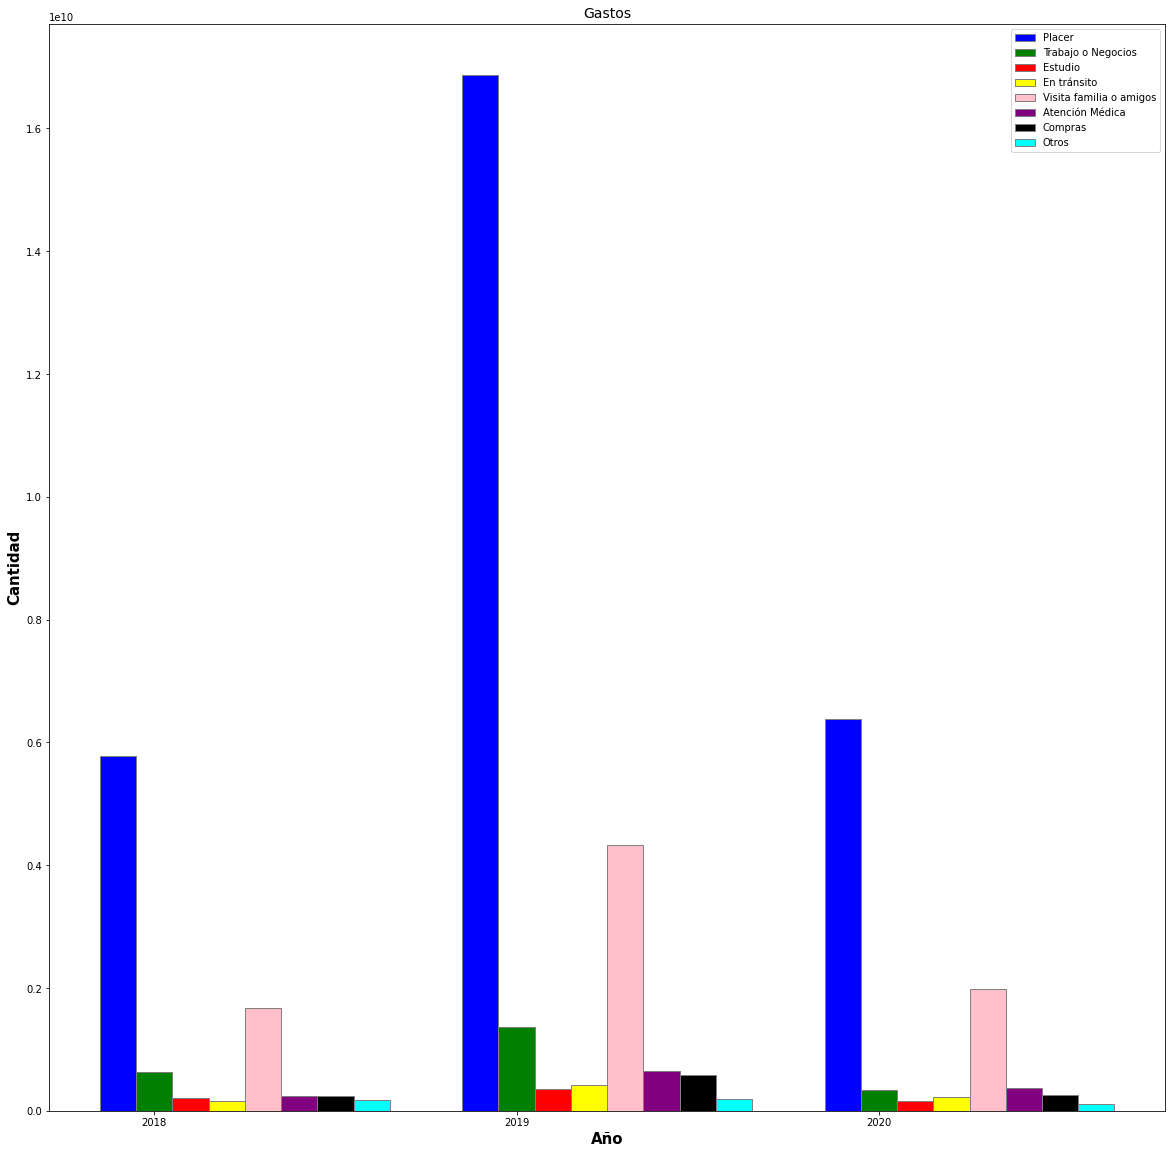

In [ ]:
# set width of bar
barWidth = 0.10
fig = plt.subplots(figsize =(20, 20))
 
# set height of bar
d1 = val["Placer"]
d2 = val["Trabajo o Negocios"]
d3 = val["Estudio"]
d4 = val["En tránsito"]
d5 = val["Visita familia o amigos"]
d6 = val["Atención Médica"]
d7 = val["Compras"]
d8 = val["Otros"]
 
# Set position of bar on X axis
br1 = np.arange(len(d1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
 
# Make the plot
plt.bar(br1, d1, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Placer')
plt.bar(br2, d2, color ='green', width = barWidth,
        edgecolor ='grey', label ='Trabajo o Negocios')
plt.bar(br3, d3, color ='red', width = barWidth,
        edgecolor ='grey', label ='Estudio')
plt.bar(br4, d4, color = 'yellow', width = barWidth,
        edgecolor ='grey', label ='En tránsito')
plt.bar(br5, d5, color ='pink', width = barWidth,
        edgecolor ='grey', label ='Visita familia o amigos')
plt.bar(br6, d6, color ='purple', width = barWidth,
        edgecolor ='grey', label ='Atención Médica')
plt.bar(br7, d7, color ='black', width = barWidth,
        edgecolor ='grey', label ='Compras')
plt.bar(br8, d8, color = 'aqua', width = barWidth,
        edgecolor ='grey', label ='Otros')
 
# Adding Xticks
plt.title('Gastos',fontsize= 14)
plt.xlabel('Año', fontweight ='bold', fontsize = 15)
plt.ylabel('Cantidad', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(d1))],
        val['Año'])
 
plt.legend()
plt.show()

In [ ]:
df = gastos
df = df[df.columns[pd.Series(df.columns).str.startswith(('Año','Mes','Tipo','Método de Transporte'))]].copy()
df['Placer'] = gastos['Placer'].tolist() 
df = df.drop(0)

df = df.set_index('Placer', drop = True)

print(df.head())

df_reportes_totales = df

           Año     Mes                        Tipo Método de Transporte
Placer                                                                 
37061291  2018  Agosto     Turistas de internación        Vía terrestre
2452448   2018  Agosto        Turistas fronterizos             Peatones
22349789  2018  Agosto        Turistas fronterizos       En automóviles
3065307   2018  Agosto  Excursionistas fronterizos             Peatones
15720223  2018  Agosto  Excursionistas fronterizos       En automóviles


In [ ]:
#Se encuentra la cantidad más grande de gasto por placer 
suma = df.sum(axis=1)
max_index = suma.idxmax() #Se copia el índice de la fila con la mayor suma

print ("La cantidad más grande de dinero gastada por placer fue: %s. Ocurrió en el año: %d" % (max_index, suma.max()))

La cantidad más grande de dinero gastada por placer fue: 1588731303. Ocurrió en el año: 2020


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
periodos = gastos[["Año", "Placer"]]
periodos

,Año,Placer
0,2018,1061709488
1,2018,37061291
2,2018,2452448
3,2018,22349789
4,2018,3065307
...,...,...
139,2020,21001534
140,2020,306202
141,2020,6412694
142,2020,802105


Text(0, 0.5, 'En escala')

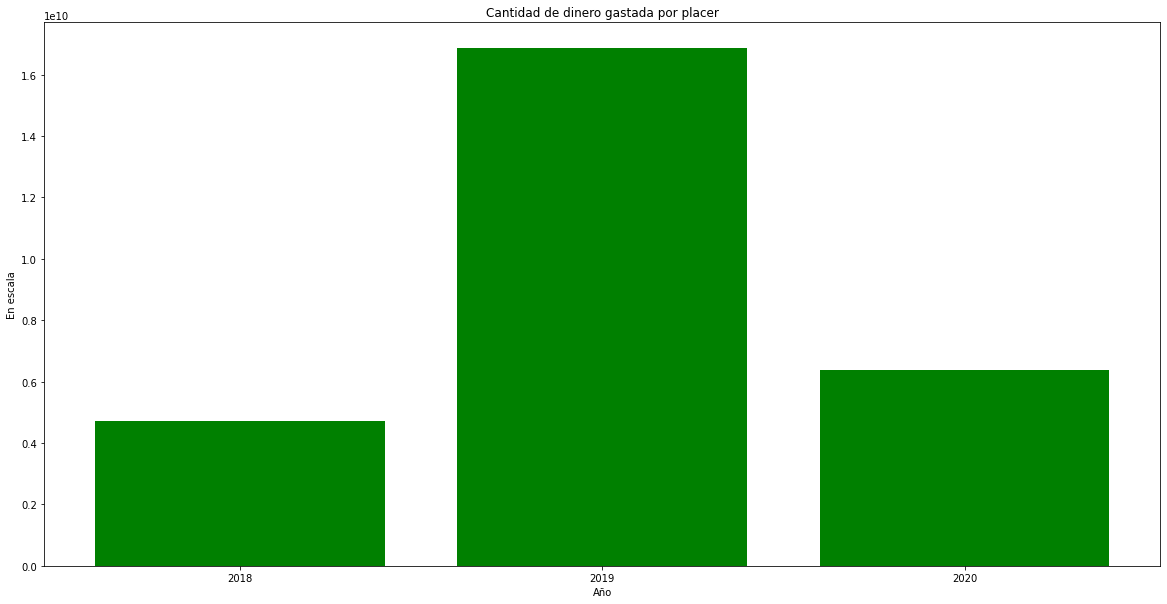

In [ ]:
#df.reset_index(inplace=True)
#df_1 = df[["Placer", "Año"]]
val = df_1.groupby("Año").sum()
val.reset_index(inplace=True)
val

#suma = df.sum(axis=1)
#suma = suma.nlargest(10)
#periodos = suma.index.tolist() #Se guardan en una lista las estaciones con más reportes
#print(periodos)

plt.figure(figsize=(20, 10))
plt.bar(val["Año"], val["Placer"], tick_label= val["Año"], color = 'green')
plt.title ("Cantidad de dinero gastada por placer")
plt.xlabel ("Año")
plt.ylabel ("En escala")

In [ ]:
val

,Año,Placer
0,2018,4715842855
1,2019,16861868641
2,2020,6372912783


In [ ]:
#Se encuentra la menor cantidad de dinero gastada 
sumas = df.sum(axis=1)
min_index = sumas.idxmin() #Se copia el índice de la fila con la menor suma

print ("La menor cantidad de dinero gastada fue: %s. Ocurrió en el año: %d" % (min_index, sumas.min()))


La menor cantidad de dinero gastada fue: 37061291. Ocurrió en el año: 2018


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Predicción de los gastos de los visitantes para 2023

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ingresos Junio 2020-2022  - Hoja 1.csv to Ingresos Junio 2020-2022  - Hoja 1.csv


In [ ]:
gastos_recientes = pd.read_csv(io.BytesIO(uploaded['Ingresos Junio 2020-2022  - Hoja 1.csv']), sep = ',')

# Forma de los datos
print('Base shape: ', gastos_recientes.shape)

Base shape:  (3, 28)


In [ ]:
gastos_recientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Junio del Año                                 3 non-null      int64  
 1   Número de Visitantes                          3 non-null      int64  
 2   Turistas Internacionales                      3 non-null      int64  
 3   Turistas de internación                       3 non-null      int64  
 4   Vía aérea                                     3 non-null      int64  
 5   Vía Terrestre                                 3 non-null      int64  
 6   Turistas fronterizos                          3 non-null      int64  
 7   Excursionistas Internacionales                3 non-null      int64  
 8   Excursionistas fronterizos                    3 non-null      int64  
 9   Excursionistas en cruceros                    3 non-null      int64  

In [ ]:
#Mejor visualización
gastos_recientes.isnull().sum().sort_values(ascending=False)

Junio del Año                                   0
Número de Visitantes                            0
Gasto Excursionistas fronterizos dólares        0
Gasto Excursionistas Internacionales dólares    0
Gasto Turistas fronterizos dólares              0
Gasto Turistas por Vía Terrestre dólares        0
Gasto Turistas por Vía aérea dólares            0
Gasto Turistas de internación dólares           0
Gasto Turistas Internacionales dólares          0
Gasto medio dólares                             0
Gasto Excursionistas en cruceros MDD            0
Gasto Excursionistas fronterizos MDD            0
Gasto Excursionistas Internacionales MDD        0
Gasto Turistas fronterizos MDD                  0
Gasto Turistas por Vía Terrestre MDD            0
Gasto Turistas por Vía aérea MDD                0
Gasto Turistas de internación MDD               0
Gasto Turistas Internacionales MDD              0
Gasto total MDD                                 0
Excursionistas en cruceros                      0


In [ ]:
gastos_recientes

,Junio del Año,Número de Visitantes,Turistas Internacionales,Turistas de internación,Vía aérea,Vía Terrestre,Turistas fronterizos,Excursionistas Internacionales,Excursionistas fronterizos,Excursionistas en cruceros,...,Gasto Excursionistas en cruceros MDD,Gasto medio dólares,Gasto Turistas Internacionales dólares,Gasto Turistas de internación dólares,Gasto Turistas por Vía aérea dólares,Gasto Turistas por Vía Terrestre dólares,Gasto Turistas fronterizos dólares,Gasto Excursionistas Internacionales dólares,Gasto Excursionistas fronterizos dólares,Gasto Excursionistas en cruceros dólares
0,2020,2448911,1003684,308409,134949,173460,695275,1445227,1445227,0,...,0.0,97.16,180.96,500.54,757.83,300.36,39.21,30.96,38.96,0.00
1,2021,4885376,3120331,1828183,1464375,363808,1292148,1765045,1749486,15559,...,0.8,404.47,603.07,974.37,1133.55,333.64,77.75,53.37,53.37,52.90
2,2022,5515782,3363239,1464375,1881562,404525,1077152,2152543,1680070,472473,...,36.6,433.68,672.50,944.04,1077.18,324.78,96.19,60.55,55.82,77.39


In [ ]:
gr = gastos_recientes.transpose()
gr.reset_index(inplace=True)
gr

,index,0,1,2
0,Junio del Año,2020.00,2021.00,2022.00
1,Número de Visitantes,2448911.00,4885376.00,5515782.00
2,Turistas Internacionales,1003684.00,3120331.00,3363239.00
3,Turistas de internación,308409.00,1828183.00,1464375.00
4,Vía aérea,134949.00,1464375.00,1881562.00
5,Vía Terrestre,173460.00,363808.00,404525.00
6,Turistas fronterizos,695275.00,1292148.00,1077152.00
7,Excursionistas Internacionales,1445227.00,1765045.00,2152543.00
8,Excursionistas fronterizos,1445227.00,1749486.00,1680070.00
9,Excursionistas en cruceros,0.00,15559.00,472473.00


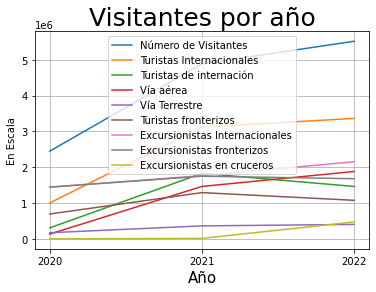

In [ ]:
x = np.arange(len(gastos_recientes['Junio del Año']))
y1 = gastos_recientes['Número de Visitantes']
y2 = gastos_recientes['Turistas Internacionales']
y3 = gastos_recientes['Turistas de internación']
y4 = gastos_recientes['Vía aérea']
y5 = gastos_recientes['Vía Terrestre']
y6 = gastos_recientes['Turistas fronterizos']
y7 = gastos_recientes['Excursionistas Internacionales']
y8 = gastos_recientes['Excursionistas fronterizos']
y9 = gastos_recientes['Excursionistas en cruceros']
fig, ax = plt.subplots()
plt.plot(x, y1, label='Número de Visitantes')
plt.plot(x, y2, label='Turistas Internacionales')
plt.plot(x, y3, label='Turistas de internación')
plt.plot(x, y4, label='Vía aérea')
plt.plot(x, y5, label='Vía Terrestre')
plt.plot(x, y6, label='Turistas fronterizos')
plt.plot(x, y7, label='Excursionistas Internacionales')
plt.plot(x, y8, label='Excursionistas fronterizos')
plt.plot(x, y9, label='Excursionistas en cruceros')
ax.set_xticks(x)
ax.set_xticklabels(gastos_recientes['Junio del Año'])
plt.xlabel('Año', fontsize=15)
plt.ylabel('En Escala', fontsize=10)
plt.title('Visitantes por año', fontsize=25)
plt.grid(True)
plt.legend()
plt.show()

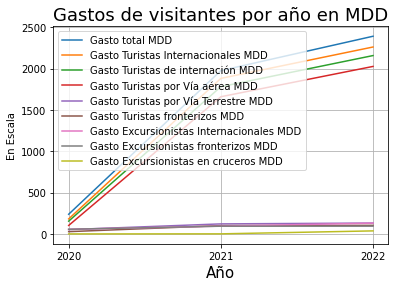

In [ ]:
x = np.arange(len(gastos_recientes['Junio del Año']))
y1 = gastos_recientes['Gasto total MDD']
y2 = gastos_recientes['Gasto Turistas Internacionales MDD']
y3 = gastos_recientes['Gasto Turistas de internación MDD']
y4 = gastos_recientes['Gasto Turistas por Vía aérea MDD']
y5 = gastos_recientes['Gasto Turistas por Vía Terrestre MDD']
y6 = gastos_recientes['Gasto Turistas fronterizos MDD']
y7 = gastos_recientes['Gasto Excursionistas Internacionales MDD']
y8 = gastos_recientes['Gasto Excursionistas fronterizos MDD']
y9 = gastos_recientes['Gasto Excursionistas en cruceros MDD']
fig, ax = plt.subplots()
plt.plot(x, y1, label='Gasto total MDD')
plt.plot(x, y2, label='Gasto Turistas Internacionales MDD')
plt.plot(x, y3, label='Gasto Turistas de internación MDD')
plt.plot(x, y4, label='Gasto Turistas por Vía aérea MDD')
plt.plot(x, y5, label='Gasto Turistas por Vía Terrestre MDD')
plt.plot(x, y6, label='Gasto Turistas fronterizos MDD')
plt.plot(x, y7, label='Gasto Excursionistas Internacionales MDD')
plt.plot(x, y8, label='Gasto Excursionistas fronterizos MDD')
plt.plot(x, y9, label='Gasto Excursionistas en cruceros MDD')
ax.set_xticks(x)
ax.set_xticklabels(gastos_recientes['Junio del Año'])
plt.xlabel('Año', fontsize=15)
plt.ylabel('En Escala', fontsize=10)
plt.title('Gastos de visitantes por año en MDD', fontsize=18)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

ftrain = ['Gasto total MDD', 'Gasto Turistas Internacionales MDD', 'Gasto Turistas de internación MDD', 'Gasto Turistas por Vía aérea MDD', 'Gasto Turistas por Vía Terrestre MDD', 'Gasto Turistas fronterizos MDD', 'Gasto Excursionistas Internacionales MDD', 'Gasto Excursionistas fronterizos MDD', 'Gasto Excursionistas en cruceros MDD']

def Definedata():
    # define dataset
    data2 = gastos_recientes[ftrain]
    X = data2.drop(columns=['Gasto total MDD']).values
    y0 = data2['Gasto total MDD'].values
    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X, y 

In [ ]:
def Models(models):
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Predicción de gastos en MDD'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

In [ ]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set', 'Accuracy on Testing set'])
#'Accuracy on Testing set'

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    
regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)
    
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS, 'Accuracy on Testing set':ATeS}),ignore_index=True )
    #'Accuracy on Testing set':ATeS

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[00:53:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
Acc.sort_values(by='Accuracy on Testing set')

,model,Root Mean Squared Error,Accuracy on Traing set,Accuracy on Testing set
0,DecisionTreeRegressor,1.000000,1.000000,NaN
1,XGBRegressor,0.991119,0.999956,NaN
2,RandomForestRegressor,0.300000,0.759600,NaN
3,MLPRegressor,115.771973,-10430.959587,NaN
4,AdaBoostRegressor,1.000000,1.000000,NaN
5,ExtraTreesRegressor,0.540000,1.000000,NaN
6,DecisionTreeRegressor,1.000000,1.000000,NaN
7,XGBRegressor,0.991119,0.999956,NaN
8,RandomForestRegressor,0.280000,0.782000,NaN
9,MLPRegressor,3.948526,0.980210,NaN


		Error Table
Mean Absolute Error      :  0.44920000000000004
Mean Squared  Error      :  0.20178064000000004
Root Mean Squared  Error :  0.44920000000000004
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


ValueError: ignored

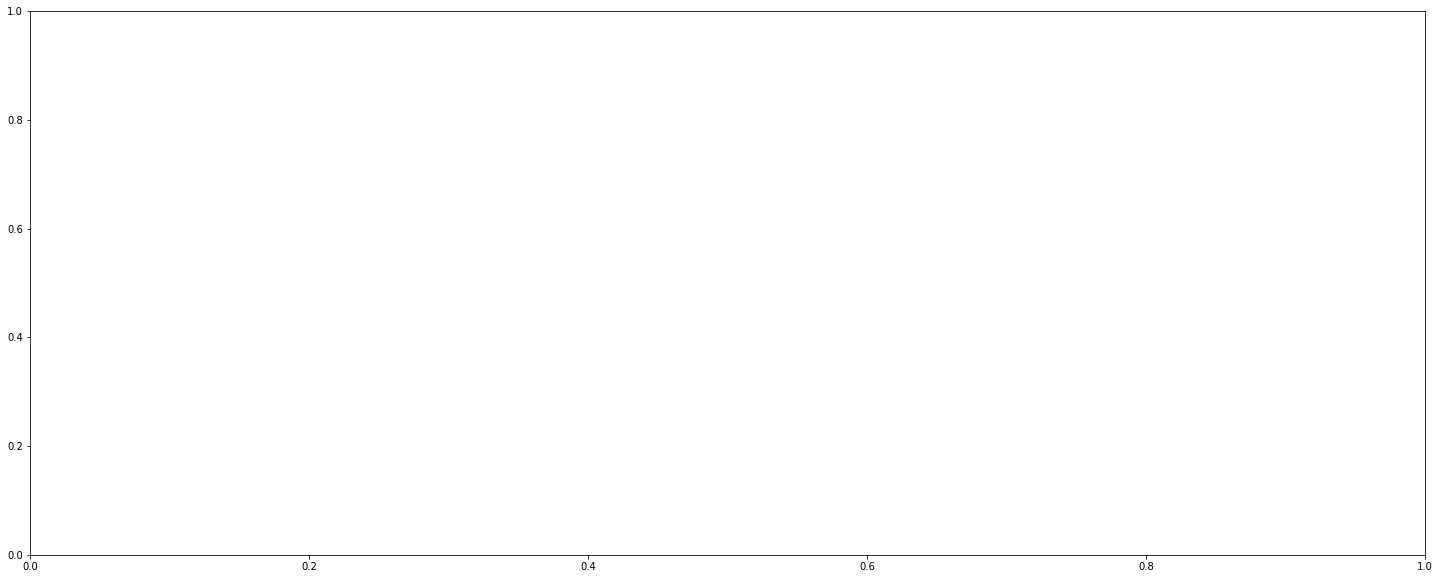

In [ ]:
y_predicted, y_actual = Models(ExtraTreesRegressor(n_estimators=10000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(150, y_actual, y_predicted)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ingresos Junio 2020-2022  - Hoja 2.csv to Ingresos Junio 2020-2022  - Hoja 2.csv


In [ ]:
gastos_recientes2 = pd.read_csv(io.BytesIO(uploaded['Ingresos Junio 2020-2022  - Hoja 2.csv']), sep = ',')

# Forma de los datos
print('Base shape: ', gastos_recientes2.shape)

Base shape:  (27, 4)


In [ ]:
gastos_recientes2

,Tipo de Visita,2020,2021,2022
0,Número de Visitantes,2448911.00,4885376.00,5515782.00
1,Turistas Internacionales,1003684.00,3120331.00,3363239.00
2,Turistas de internación,308409.00,1828183.00,1464375.00
3,Vía aérea,134949.00,1464375.00,1881562.00
4,Vía Terrestre,173460.00,363808.00,404525.00
5,Turistas fronterizos,695275.00,1292148.00,1077152.00
6,Excursionistas Internacionales,1445227.00,1765045.00,2152543.00
7,Excursionistas fronterizos,1445227.00,1749486.00,1680070.00
8,Excursionistas en cruceros,0.00,15559.00,472473.00
9,Gasto total MDD,238.00,1976.00,2392.00


In [ ]:
#Se crea un dataframe con los datos de los años y los MDD gastados
df = gastos_recientes2
df = df[df.columns[pd.Series(df.columns).str.startswith(('2020', '2021', '2022'))]].copy()#Se guardan las columnas que contienen datos de feminicidios
df['Tipo de Visita'] = gastos_recientes2['Tipo de Visita'].tolist() 
df = df.drop(0) 
df = df.set_index('Tipo de Visita', drop = True) 
print(df.head())

df_delitos = df

                               2020       2021       2022
Tipo de Visita                                           
Turistas Internacionales  1003684.0  3120331.0  3363239.0
Turistas de internación    308409.0  1828183.0  1464375.0
Vía aérea                  134949.0  1464375.0  1881562.0
Vía Terrestre              173460.0   363808.0   404525.0
Turistas fronterizos       695275.0  1292148.0  1077152.0


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
forecast = list()
est_dict = dict()
for i in range(len(df)):
  row = df.iloc[i].values
  model = SARIMAX(row)
  results = model.fit()
  forecast.append(round(results.predict(start=6,end=6,dynamic=True)[0]))

df["forecast"] = forecast
df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/st

,2020,2021,2022,forecast
Tipo de Visita,,,,
Turistas Internacionales,1003684.00,3120331.00,3363239.00,1687195
Turistas de internación,308409.00,1828183.00,1464375.00,206532
Vía aérea,134949.00,1464375.00,1881562.00,569466
Vía Terrestre,173460.00,363808.00,404525.00,307453
Turistas fronterizos,695275.00,1292148.00,1077152.00,663652
Excursionistas Internacionales,1445227.00,1765045.00,2152543.00,2152543
Excursionistas fronterizos,1445227.00,1749486.00,1680070.00,1627211
Excursionistas en cruceros,0.00,15559.00,472473.00,472473
Gasto total MDD,238.00,1976.00,2392.00,720
